<a href="https://colab.research.google.com/github/flapperz/NLP_2021/blob/main/MIDTERM/midterm_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
!gdown --id 15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD

Downloading...
From: https://drive.google.com/uc?id=1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
To: /content/test_without_label.pkl
100% 1.15M/1.15M [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD
To: /content/train_with_label.pkl
3.18MB [00:00, 50.1MB/s]


In [ ]:
def write_submission(submission, path = 'out.txt'):
  f = open(path, 'wb')
  [f.write((i + '\n').encode()) for i in submission ]

import pickle
X_train = pickle.load(open('train_with_label.pkl', 'rb'))
X_test = pickle.load(open('test_without_label.pkl', 'rb'))



In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# write_submission(submission_template)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## EDA

In [ ]:
from pythainlp.spell import correct, spell, NorvigSpellChecker
correct('ครัฟ')

In [ ]:
def unpack_index(l):
    idx0 = l[0]
    idx1 = l[1]
    if idx0 == idx1 - 1:
        return [l]
    res = []
    for idx in range(idx0,idx1):
        res.append([idx,idx+1])
    return res


In [ ]:
misspellw = []
correctw = []
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        misspellw += sent[label[0][0]:label[0][1]]
        correctw += label[1]
misspellw_set = set(misspellw)
df_corrw = pd.DataFrame({'word':correctw, 'c':[1]*len(correctw)})
df_missw = pd.DataFrame({'word':misspellw, 'c':[1]*len(misspellw)})

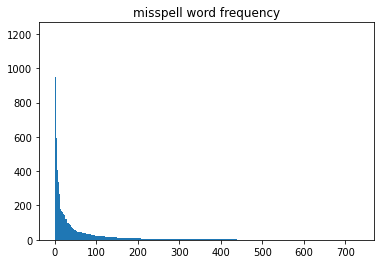

In [ ]:
agg = df_missw.groupby('word').count().sort_values(['c'], ascending=False)

plt.bar(np.arange(len(agg)),agg.c.values,width=1)
plt.title('misspell word frequency')
plt.show()

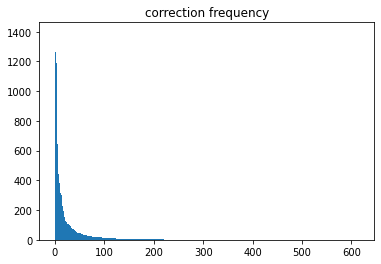

In [ ]:
agg2 = df_corrw.groupby('word').count().sort_values(['c'], ascending=False)

plt.bar(np.arange(len(agg2)),agg2.c.values,width=1)
plt.title('correction frequency')
plt.show()

In [ ]:
for w in agg.index[:200]:
    print(w + ' ', end='')
print()
for w in agg2.index[:200]:
    print(w + ' ', end='')
    

อ่ะ ค่ะ คับ คะ ค้ะ เบอ สมัค มั้ย อ่อ แอพ เปน ก้ ยังไง แอฟ ใด้ ไม มั๊ย คัฟ อยุ่ ไง หรอ ใหม บช เรย โทรศัพ บันชี ก้อ ไหม่ เคดิต รุ้ แร้ว ใหน ป่ะ ม่ อะ ค่ เค้า ตัง อ้ะ เปลียน ยังงัย ตุ้ ขอบคุน   ป่าว ไช่ เชค ใช่ ค ไม๊ คร้า นึง ยุ งัย ได่ เท่าไหร่ ดิ อินเตอร์เน็ต ใม่ จขกท เบอร โทรสับ จร้า โทรศัพย์ บัชชี ค่าาา ครัช . ขอโทด โทรสัพ ธ โหลด เนต ค่า น่ะ รึป่าว ค๊ะ เด๋ว หรือป่าว ไม่ เวป โทสับ น่อย น้ะ อะรัย ออนไล เนอะ ต่ะ ไห้ คนับ ด้ โท กะ แอป กุ้ ไทยพานิชย์ พิม ข้อมุล ใช้ เปิดบันชี เคแบงค์ เคาเตอร์ เบอร์ ช เนี้ย ยังใง ละ เน็ต ทำ คร่ ใว้ รึ ยุ่ คร้าบ ม่ะ คอลเซนเตอร์ บ เปนไร หรัส นู๋ มัย เช้ค พึ่ง เปิด ไร แบงค์ ตปท เปง เช็ค ปะ ที ก หน่ะ อิก ใง ฮาาา ปัย บัณชี เห้น ล่ะ ด้าย เงืน แล้ว ใข่ เหรอ ล๊อก คพ จ้า ทรัพ ลิ้ง นี่ จิง ยัง จ่ะ ม ไมา สวัดดี เทอ ฯ ออม พร้อมเพ นะ ตังค์ จัย อัพเดต แลัว ยัตร ที่ ล้ะ เนาะ เเร้ว แบงกิ้ง เครือง ้ คุน ใข้ คน ผม มี เลย ยาก ล็อค รัย เปี่ยน โห ประมาน รีไฟแนน ดี ค้ เน้ต มั่ง ว่า ว่ะ แล้ส แบง เดียว ซัก แอพพลิเคชั่น คราบ เห้อ 
คะ อะ ครับ ค่ะ ไหม เบอร์ อย่างไร แอป สมัคร ก็ เป็น อ

In [ ]:
MAX_KEY_LEN = 6
miss2corr_dict = defaultdict(lambda :defaultdict(int))

for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        # di = label[0][1] - label[0][0]
        # if label[0][1] - label[0][0] == 1:
        #     unpacked = unpack_index(label[0])
        #     for i,idx in enumerate(unpacked):
        #         miss2corr_dict[(sent[idx[0]],)][(label[1][i],)] += 1
        # else:
        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[key][tuple(label[1])] += 1
len(miss2corr_dict)

1589

In [ ]:
miss2corr_dict

## Preprocess

In [ ]:
X_train_pp = [x[0] for x in X_train]

In [ ]:
y_train = []
for x in X_train:
    sent = x[0]
    morph = []
    idx = 0
    for label in x[1]:
        morph += sent[idx:label[0][0]]
        morph += label[1]
        idx = label[0][1]
    morph += sent[idx:len(sent)]
    y_train.append(morph)

## Non-Word / Real-Word classification and correction (Busted)

### None-Word Missspell

In [ ]:
!wget https://gist.githubusercontent.com/anonymous/36568e5aaa73790e718757ff5f481afe/raw/51fa364bab4783596c3192c2c1d4b155fbdac83d/thai.dict

--2021-03-14 11:25:29--  https://gist.githubusercontent.com/anonymous/36568e5aaa73790e718757ff5f481afe/raw/51fa364bab4783596c3192c2c1d4b155fbdac83d/thai.dict
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857451 (837K) [text/plain]
Saving to: ‘thai.dict’

thai.dict           100%[===================>] 837.35K  --.-KB/s    in 0.02s   

2021-03-14 11:25:29 (47.4 MB/s) - ‘thai.dict’ saved [857451/857451]



In [ ]:
!pip install pythainlp

In [ ]:
# dictionary0
dict0 = set()
with open('thai.dict','r') as f:
    for l in f:
        dict0.add(l.strip())
dict0.update(['ค่ะ'])

# tcc corpus
import pythainlp.corpus.ttc as tcc
tcc_dict = set()
tcc_word_freqs = tcc.word_freqs()
for freq in tcc_word_freqs:
    tcc_dict.add(freq[0])

# train set
kbtg_dict = set()
for k,v in miss2corr_dict.items():
    if len(k) == 1:
        kbtg_dict.add(sorted(v.items(), key=lambda x: x[1], reverse=True)[0][0][0])
print(len(kbtg_dict))

# combine
extra_dict = {'คอลเซ็นเตอร์', 'จริงจริง'}

dictionary = tcc_dict
dictionary.update(dict0)
dictionary.update(kbtg_dict)
dictionary.update(extra_dict)

dictionary.remove(' ')
dictionary.remove('')
dictionary.remove('ก')
dictionary.remove('เปน')
len(dictionary)

312


42501

In [ ]:
def is_nonword_miss(w, d):
    return not w in d

In [ ]:
# predict
y_train_s = []
for x in X_train:
    sent = x[0]
    pred = []
    for i,w in enumerate(sent):
        if is_nonword_miss(w, dictionary):
            if pred and pred[-1][1] == i:
                pred[-1] = [pred[-1][0],i+1]
            else:
                pred.append([i,i+1])
    y_train_s.append(list(pred))

# evaluate
tp = 0
tn = 0
fp = 0
fn = 0
for i,x in enumerate(X_train):
    actual = set()
    for label in x[1]:
        actual.update([idx[0] for idx in unpack_index(label[0])])
    pred = set()
    for label in y_train_s[i]:
        pred.update([idx[0] for idx in unpack_index(label)])

    n = len(x[0])
    tp_ = len(actual.intersection(pred))
    tp += tp_
    tn += n - len(actual.union(pred))
    fp += len(pred) - tp_
    fn += len(actual) - tp_

# print result
tp + tn + fp + fn
print('recall', tp/(tp+fn))
print('precision', tp/(tp+fp))
print('accuracy', (tp+tn)/(tp+tn+fp+fn))
print('fp-rate', fp/(tn+fp))
# print('#true', tp+fn)
# print('#false', tn+fp)
# print('sum',tp+tn+fp+fn)

recall 0.24640060621369034
precision 1.0
accuracy 0.8817654926437807
fp-rate 0.0


In [ ]:
'พนง' in dictionary

False

In [ ]:
def find_cer(src,dst):
    m = np.zeros((len(src)+1,len(dst)+1), dtype=np.uint16)
    m[0,:] = np.arange(len(dst)+1)
    m[:,0] = np.arange(len(src)+1)
    for i in range(len(src)):
        for j in range(len(dst)):
            m[i+1,j+1] = min([
                              m[i,j+1] + 1,
                              m[i+1,j] + 1,
                              m[i,j] if src[i] == dst[j] else m[i,j] +1
            ])
    return m[-1,-1]
find_cer('ขนอ','กขนาน')

3

### ClassifyAndCorrect CNC

In [ ]:
one_word_list = list(filter(lambda k: len(k) == 1, miss2corr_dict))
correction_dict = {k[0]:sorted(miss2corr_dict[k].items(), reverse=True, key=lambda x: x[1])[0][0][0] for k in one_word_list}
list(correction_dict.items())[:5]

print('before clean', len(correction_dict))

# clean
del correction_dict['K PLUS']
del correction_dict['ไวไฟ']
del correction_dict['แอป']

keys = list(correction_dict.keys())
for k in keys:
    if k in dictionary:
        del correction_dict[k]



print('after clean', len(correction_dict))

cnc_cache = dict()
def correct_nonword(wi):
    if wi in dictionary:
        return wi
    
    if wi in correction_dict:
        return correction_dict[wi]
    elif wi in cnc_cache:
        return cnc_cache[wi]
    else:
        candidates = set(filter(lambda x: len(x) <= len(wi)+2 and len(x) >= len(wi)-2, dictionary))
        candidates = set(filter(lambda x: len(set(x).intersection(set(wi))) > len(set(wi))-3, candidates))
        order = sorted([(c,find_cer(c, wi)) for c in candidates], key=lambda x: x[1], reverse=False)
        res = ''
        if order and order[0][1] <= 4:
            res = order[0][0]
        else:
            print('cannot find candidate', wi)
            res = wi
        cnc_cache[wi] = res
        return res
    
print('หริอ',correct_nonword('หริอ'))
print('ถูก',correct_nonword('ถูก'))
print('ธรรมชาด',correct_nonword('ธรรมชาด'))
print('หิส',correct_nonword('หิส'))
print('คอลเซ้นเตอร',correct_nonword('คอลเซ้นเตอร'))
print('จริงจริ๊ง',correct_nonword('จริงจริ๊ง'))

before clean 505
after clean 336
หริอ หรือ
ถูก ถูก
ธรรมชาด ธรรมกาย
หิส หิน
คอลเซ้นเตอร คอลเซ็นเตอร์
จริงจริ๊ง จริงจริง


In [ ]:
def get_cnc(s):
    res = [correct_nonword(wi) for wi in s]
    return res

## Rulebase E2E

### Rulebase 1 : 5.58

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[di-1][key].append(tuple(label[1]))

correction_dict = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        if first[0] > 100:
            correction_dict[di][k] = first[1]

# clean
correction_dict[1][('อะ', 'คะ')] = ('อะ', 'ค่ะ')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(2,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

### Rulebase 2 4.94

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[di-1][key].append(tuple(label[1]))

correction_dict = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 50
        elif di == 1:
            minimum = 10
        elif di == 2:
            minimum = 3
             
        if first[0] > minimum:
            correction_dict[di][k] = first[1]

# clean
correction_dict[1][('อะ', 'คะ')] = ('อะ', 'ค่ะ')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(3,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรสับอะค่ะ
ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ


('ที่',) ('ที',)
('อะ', 'คะ') ('อ่ะ', 'ค่ะ')
('เบอ', 'โทรสับ') ('เบอร์', 'โทรศัพท์')
('อะ', 'คะ') ('อ่ะ', 'ค่ะ')
โอนผิดทีเข้าบช อ่ะค่ะเบอร์โทรศัพท์อ่ะค่ะ
ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ


In [ ]:

def predict(X, model, size=None):
    y = []
    if size == None:
        size = len(X)
    for i,x in enumerate(X[:size]):
        if i % 1000 == 0:
            print(i)
        sent = x
        pred = model(sent)
        y.append(pred)
    return y


In [ ]:
# baseline
# y_pred = predict(X_train_pp, get_correct_rulebase)
cer = 0
for i in range(len(y_train[:1000])):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(X_train_pp[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  
0.261


In [ ]:
# Test On Train


# Evaluate
# result = pd.DataFrame(columns=['actl','pred','cer'], dtype=object)
y_pred = predict(X_train_pp, get_correct_rulebase, size=1000)
cer = 0
for i in range(len(y_pred)):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(y_pred[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0
0  100  200  300  400  500  600  700  800  900  
0.2314


In [ ]:
cer

47

### Rulebase 3 4.28

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict_rb = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict_rb[di-1][key].append(tuple(label[1]))

correction_dict_rb = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict_rb[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 18
        elif di == 1:
            minimum = 3
        elif di == 2:
            minimum = 2
             
        if first[0] > minimum:
            correction_dict_rb[di][k] = first[1]

# clean
correction_dict_rb[1][('อะ', 'คะ')] = ('อะ', 'ค่ะ')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(4,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict_rb[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict_rb[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ
ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ


In [ ]:
def get_cnc_rb(s):
    return get_cnc(get_correct_rulebase(s))


### Rulebase 4 3.94

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict_rb = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict_rb[di-1][key].append(tuple(label[1]))

correction_dict_rb = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict_rb[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 1
        elif di == 1:
            minimum = 3
        elif di == 2:
            minimum = 2

        if first[0] > minimum:
            correction_dict_rb[di][k] = first[1]

print(len(correction_dict_rb[0]))
keys = list(correction_dict_rb[0].keys())
for k in keys:
    if k[0] in dictionary:
        del correction_dict_rb[0][k]
print(len(correction_dict_rb[0]))

# hand 
correction_dict_rb[1][('อะ', 'คะ')] = ('อะ', 'ค่ะ')
# correction_dict_rb[0][('อ่ะ',)] = ('อะ')

def kakakub_corrector(s):
    res = list(s)
    for i in range(len(s)):
        wi = s[i]
        kas = ['ค่ะ','คะ','คร้า','คร่า']
        if wi == 'คับ':
            res[i] = 'ครับ'
        elif wi in kas:
            # first of sentence
            if i >= 2 and s[i-2] == 'หรือ':
                res[i] = 'คะ'
            elif i >= 1:
                question_que = ['หรือ','ไหม','ไง','ไร','ไหร่','ไหน','ไม','นะ','เปล่า','หรอ']
                if res[i-1] in question_que:
                    res[i] = 'คะ'
                else:
                    res[i] = 'ค่ะ'

            elif i == 0:
                res[i] = 'ค่ะ'
            else:
                res[i] = wi
        else:
            res[i] = wi
    return res
print(kakakub_corrector(['นะ','ค่ะ']))
import string
def repetition_corrector(s):
    res = []
    for wi in s:
        if len(wi) < 3:
            res.append(wi)
            continue 
        if wi[0] in string.ascii_lowercase:
            res.append(wi)
            continue
        collective = ''
        newwi = ''
        for i,char in enumerate(wi):
            if collective:
                if collective[-1] == char:
                    collective += char
                else:
                    if len(collective) >= 3:
                        newwi += collective[0]
                    else:
                        newwi += collective+char
                    collective = ''
            else:
                collective += char

        if len(collective) >= 3:
            newwi += collective[0]
        else:
            newwi += collective
        res.append(newwi)
    return res
print(repetition_corrector(['ไว','กันน','บรรจง','สาสสสส','กิกกะ','รร','มากกกกก','รหัส']))

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(4,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict_rb[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict_rb[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1

    # correct ka ka
    res = kakakub_corrector(res)
    res = repetition_corrector(res)
    return res



print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

291
198
['นะ', 'คะ']
['ไว', 'กันน', 'บรรจง', 'สาส', 'กิกกะ', 'รร', 'มาก', 'รหัส']
ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ
ทำรายการที่ตู้atm อะค่ะ เป็นการทำรายการเปลี่ยนเบอร์โทรศัพท์อะค่ะ


### Wangchan berta

In [ ]:
!pip -q install transformers==3.5.0 thai2transformers==0.1.1 
!pip -q install torch==1.5.0 torchtext==0.4.0 torchvision==0.6.0

     |████████████████████████████████| 1.3MB 21.9MB/s 
     |████████████████████████████████| 890kB 51.6MB/s 
     |████████████████████████████████| 2.9MB 50.7MB/s 
     |████████████████████████████████| 1.1MB 52.6MB/s 
     |████████████████████████████████| 133kB 50.6MB/s 
     |████████████████████████████████| 194kB 53.6MB/s 
     |████████████████████████████████| 8.7MB 44.1MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 829kB 46.0MB/s 
     |████████████████████████████████| 10.1MB 27.1MB/s 
     |████████████████████████████████| 481kB 53.9MB/s 
     |████████████████████████████████| 245kB 59.4MB/s 
     |████████████████████████████████| 112kB 62.6MB/s 
     |████████████████████████████████| 327kB 61.7MB/s 
     |████████████████████████████████| 829kB 46.1MB/s 
     |████████████████████████████████| 276kB 42.7MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 752.0MB 23

In [ ]:
#pipeline
import numpy as np
from tqdm.auto import tqdm
import torch

#datasets
from datasets import load_dataset

#transformers
from transformers import (
    CamembertTokenizer,
    AutoTokenizer,
    AutoModel,
    AutoModelForMaskedLM,
    AutoModelForSequenceClassification,
    AutoModelForTokenClassification,
    TrainingArguments,
    Trainer,
    pipeline,
)

#thai2transformers
import thai2transformers
from thai2transformers.preprocess import process_transformers
from thai2transformers.metrics import (
    classification_metrics, 
    multilabel_classification_metrics,
)
from thai2transformers.tokenizers import (
    ThaiRobertaTokenizer,
    ThaiWordsNewmmTokenizer,
    ThaiWordsSyllableTokenizer,
    FakeSefrCutTokenizer,
    SEFR_SPLIT_TOKEN
)

model_names = [
    'wangchanberta-base-att-spm-uncased',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'wangchanberta-base-wiki-newmm',
    'wangchanberta-base-wiki-ssg',
    'wangchanberta-base-wiki-sefr',
    'wangchanberta-base-wiki-spm',
]

tokenizers = {
    'wangchanberta-base-att-spm-uncased': AutoTokenizer,
    'xlm-roberta-base': AutoTokenizer,
    'bert-base-multilingual-cased': AutoTokenizer,
    'wangchanberta-base-wiki-newmm': ThaiWordsNewmmTokenizer,
    'wangchanberta-base-wiki-ssg': ThaiWordsSyllableTokenizer,
    'wangchanberta-base-wiki-sefr': FakeSefrCutTokenizer,
    'wangchanberta-base-wiki-spm': ThaiRobertaTokenizer,
}
#@title Choose Pretrained Model
model_name = "wangchanberta-base-att-spm-uncased" #@param ['wangchanberta-base-att-spm-uncased','xlm-roberta-base','bert-base-multilingual-cased','wangchanberta-base-wiki-newmm','wangchanberta-base-wiki-ssg','wangchanberta-base-wiki-sefr','wangchanberta-base-wiki-spm']
public_models = ['xlm-roberta-base', 'bert-base-multilingual-cased'] 
#create tokenizer
tokenizer = tokenizers[model_name].from_pretrained(
                f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
                revision='main',
                model_max_length=416,)


In [ ]:

fill_mask = pipeline(task='fill-mask',
         tokenizer=tokenizer,
         model = f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
         revision = 'main',)

input_text = 'สอบถามเรื่องการกู้เงิน<mask>'
input_text2 = 'และ กรณีบัตรก็กดเงินไม่ได้ด้วยละ<mask>'
input_text3 = 'เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหม<mask>'
def predict_word(input_text):
    if model_name not in public_models:
        input_text = process_transformers(input_text)
    print(input_text)
    #if the sequence is too short, it needs padding
    def fill_mask_pad(input_text):
        return fill_mask(input_text+'<pad>', top_k=10 )
    #infer
    display(fill_mask_pad(input_text))

predict_word(input_text)
predict_word(input_text2)
predict_word(input_text3)



สอบถามเรื่องการกู้เงิน<mask>


[{'score': 0.2123774290084839,
  'sequence': '<s> สอบถามเรื่องการกู้เงินค่ะ</s>',
  'token': 70,
  'token_str': 'ค่ะ'},
 {'score': 0.14614567160606384,
  'sequence': '<s> สอบถามเรื่องการกู้เงินหน่อยครับ</s>',
  'token': 4631,
  'token_str': 'หน่อยครับ'},
 {'score': 0.1396472007036209,
  'sequence': '<s> สอบถามเรื่องการกู้เงินหน่อยค่ะ</s>',
  'token': 5952,
  'token_str': 'หน่อยค่ะ'},
 {'score': 0.11569853872060776,
  'sequence': '<s> สอบถามเรื่องการกู้เงินครับ</s>',
  'token': 73,
  'token_str': 'ครับ'},
 {'score': 0.04105757549405098,
  'sequence': '<s> สอบถามเรื่องการกู้เงินด้วยค่ะ</s>',
  'token': 2678,
  'token_str': 'ด้วยค่ะ'},
 {'score': 0.037758953869342804,
  'sequence': '<s> สอบถามเรื่องการกู้เงินซื้อบ้าน</s>',
  'token': 15483,
  'token_str': 'ซื้อบ้าน'},
 {'score': 0.03439703956246376,
  'sequence': '<s> สอบถามเรื่องการกู้เงินคะ</s>',
  'token': 260,
  'token_str': 'คะ'},
 {'score': 0.03358927741646767,
  'sequence': '<s> สอบถามเรื่องการกู้เงินด้วยครับ</s>',
  'token': 3166,

และ<_>กรณีบัตรก็กดเงินไม่ได้ด้วยละ<mask>


[{'score': 0.11764122545719147,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละค่ะ</s>',
  'token': 70,
  'token_str': 'ค่ะ'},
 {'score': 0.10228695720434189,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละสิ</s>',
  'token': 282,
  'token_str': 'สิ'},
 {'score': 0.09971749037504196,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละคะ</s>',
  'token': 260,
  'token_str': 'คะ'},
 {'score': 0.047115202993154526,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละจ้า</s>',
  'token': 809,
  'token_str': 'จ้า'},
 {'score': 0.04654613509774208,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละซิ</s>',
  'token': 817,
  'token_str': 'ซิ'},
 {'score': 0.03699486702680588,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละ5</s>',
  'token': 65,
  'token_str': '5'},
 {'score': 0.027528980746865273,
  'sequence': '<s> และ<_> กรณีบัตรก็กดเงินไม่ได้ด้วยละ...</s>',
  'token': 85,
  'token_str': '...'},
 {'score': 0.025052731856703758,
  'sequence': '<s> และ<_> กรณีบัต

เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหม<mask>


[{'score': 0.8271541595458984,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมค่ะ</s>',
  'token': 70,
  'token_str': 'ค่ะ'},
 {'score': 0.03535289689898491,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมคับ</s>',
  'token': 801,
  'token_str': 'คับ'},
 {'score': 0.014797400683164597,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหม?</s>',
  'token': 57,
  'token_str': '?'},
 {'score': 0.01010396983474493,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมค้ะ</s>',
  'token': 14237,
  'token_str': 'ค้ะ'},
 {'score': 0.009328199550509453,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมอ่ะ</s>',
  'token': 406,
  'token_str': 'อ่ะ'},
 {'score': 0.007190230302512646,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมอะ</s>',
  'token': 300,
  'token_str': 'อะ'},
 {'score': 0.003547506872564554,
  'sequence': '<s> เปลี่ยนเป็นฝากเงินอย่างเดียวได้ไหมคัฟ</s>',
  'token': 20123,
  'token_str': 'คัฟ'},
 {'score': 0.0031014583073556423,
  'sequence': '<s> เปลี่ยนเป็

In [ ]:
from pythainlp.util import isthaichar
fill_mask = pipeline(task='fill-mask',
         tokenizer=tokenizer,
         model = f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
         revision = 'main',)

def get_realword_correct(s):
    for idx,wi in enumerate(s):
        tmp = list(s)
        tmp[idx] = '<mask>'
        input_text = ''.join(tmp)
        input_text = process_transformers(input_text)
        predict = fill_mask(input_text+'<pad>', top_k=25 )
        print(predict)

get_realword_correct(['ออม','กะ','ไม่','ออม','เนี้ย'])

[{'sequence': '<s> กู กะไม่ออมเนี้ย</s>', 'score': 0.06268451362848282, 'token': 3256, 'token_str': '▁กู'}, {'sequence': '<s> แต่ กะไม่ออมเนี้ย</s>', 'score': 0.04881353676319122, 'token': 294, 'token_str': '▁แต่'}, {'sequence': '<s> ทําไม กะไม่ออมเนี้ย</s>', 'score': 0.04798823595046997, 'token': 1202, 'token_str': '▁ทําไม'}, {'sequence': '<s> แล้ว กะไม่ออมเนี้ย</s>', 'score': 0.043282002210617065, 'token': 627, 'token_str': '▁แล้ว'}, {'sequence': '<s> ทุกวันนี้ กะไม่ออมเนี้ย</s>', 'score': 0.04234914854168892, 'token': 10644, 'token_str': '▁ทุกวันนี้'}, {'sequence': '<s> ไม่ กะไม่ออมเนี้ย</s>', 'score': 0.04113205522298813, 'token': 729, 'token_str': '▁ไม่'}, {'sequence': '<s> นี่ กะไม่ออมเนี้ย</s>', 'score': 0.034638214856386185, 'token': 1298, 'token_str': '▁นี่'}, {'sequence': '<s> สุดท้าย กะไม่ออมเนี้ย</s>', 'score': 0.02369939722120762, 'token': 10496, 'token_str': '▁สุดท้าย'}, {'sequence': '<s> มี กะไม่ออมเนี้ย</s>', 'score': 0.01983347162604332, 'token': 471, 'token_str': '▁มี

In [ ]:
def get_cnc_rb(s):
    return get_cnc(get_correct_rulebase(s))


## Evaluate

In [ ]:

def predict(X, model, size=None):
    y = []
    if size == None:
        size = len(X)
    for i,x in enumerate(X[:size]):
        if i % 100 == 0:
            print(i,' ',end='')
        sent = x
        pred = model(sent)
        y.append(pred)
    return y


In [ ]:
# baseline
# y_pred = predict(X_train_pp, get_correct_rulebase)
cer = 0
for i in range(len(y_train[:1000])):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(X_train_pp[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  
0.261


In [ ]:
# Test On Train


# Evaluate
# result = pd.DataFrame(columns=['actl','pred','cer'], dtype=object)
y_pred = predict(X_train_pp, get_correct_rulebase, size=1000)
cer = 0
for i in range(len(y_pred)):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(y_pred[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  0  100  200  300  400  500  600  700  800  900  
0.1543


In [ ]:
cer

47

### Test on Test

In [ ]:
X_test

In [ ]:
#submission example
result = predict(X_test, get_correct_rulebase)
submission_template = ["".join(i) for i in result]
submission_template
write_submission(submission_template)
len(submission_template)

0  100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800  4900  5000  5100  5200  5300  5400  5500  

5597